In [3]:
#Importar librerías
import numpy as np #numpy
import pandas as pd #pandas
import sklearn as sk #scikit-learn
import matplotlib.pyplot as plt #gráfica Matplotlib
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.model_selection import train_test_split

#Importamos la base de datos
data = pd.read_csv('olimpiadas.csv',sep=',')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


nos quedamos con: nombre, sex, age, height, weight, games, NOC, event, medal 

In [4]:
df=data[['Name', 'Sex', 'Age', 'Height', 'Weight', 'Games', 'NOC', 'Event', 'Medal']]

In [5]:
df.info(verbose=True, null_counts=True)

<ipython-input-5-6ac79f7ef903>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Sex     271116 non-null  object 
 2   Age     261642 non-null  float64
 3   Height  210945 non-null  float64
 4   Weight  208241 non-null  float64
 5   Games   271116 non-null  object 
 6   NOC     271116 non-null  object 
 7   Event   271116 non-null  object 
 8   Medal   39783 non-null   object 
dtypes: float64(3), object(6)
memory usage: 18.6+ MB


In [6]:
# Calcula la media de la columna 'columna'
mediaA = df['Age'].mean()
# Rellena los valores NaN con la media
df['Age'].fillna(mediaA, inplace=True) 
# Calcula la media de la columna 'columna'
mediaH = df['Height'].mean()
# Rellena los valores NaN con la media
df['Height'].fillna(mediaH, inplace=True) 
# Calcula la media de la columna 'columna'
mediaW = df['Weight'].mean()
# Rellena los valores NaN con la media
df['Weight'].fillna(mediaW, inplace=True) 
# Rellena los valores NaN con la palabra "zero"
df['Medal'].fillna('Zero', inplace=True)

<ipython-input-6-a2b99e642094>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].fillna(mediaA, inplace=True)
<ipython-input-6-a2b99e642094>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Height'].fillna(mediaH, inplace=True)
<ipython-input-6-a2b99e642094>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weight'].fillna(mediaW, inplace=True)
<ipython-input-6-a2b99e642094>:14: SettingWithCopyWarning: 
A value is tryi

In [7]:
df['Height'].isnull().sum()

0

In [8]:
df['Age'].isnull().sum()

0

In [9]:
df['Weight'].isnull().sum()

0

In [10]:
df.head()

,Name,Sex,Age,Height,Weight,Games,NOC,Event,Medal
0,A Dijiang,M,24.0,180.00000,80.000000,1992 Summer,CHN,Basketball Men's Basketball,Zero
1,A Lamusi,M,23.0,170.00000,60.000000,2012 Summer,CHN,Judo Men's Extra-Lightweight,Zero
2,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,1920 Summer,DEN,Football Men's Football,Zero
3,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,1900 Summer,DEN,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,1988 Winter,NED,Speed Skating Women's 500 metres,Zero


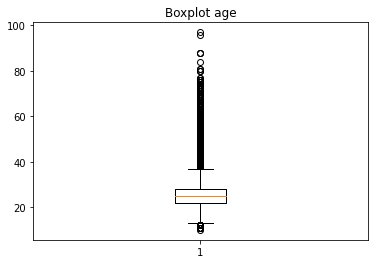

In [11]:
import matplotlib.pyplot as plt
boxplot_age=df['Age']
plt.boxplot(boxplot_age)
plt.title('Boxplot age')
plt.show()

In [12]:
from matplotlib.cbook import boxplot_stats 
stats = boxplot_stats(boxplot_age)
stats = stats[0] 
outliers = stats['fliers']
min = stats['q1']-1.5*stats['iqr']
max = stats['q3']+1.5*stats['iqr']
print(min, max, len(outliers))

13.0 37.0 11981


Para las categorías: 

In [13]:
corte1 = min
corte2 = max
df['Age_cat'] = "Jóven"
df.loc[(df['Age'] > corte1) & (df['Age'] <= corte2), 'Age_cat'] = "Media"
df.loc[df['Age'] > corte2, 'Age_cat'] = "Mayor"


<ipython-input-13-5df1dc3a6f76>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_cat'] = "Jóven"


In [14]:
df

,Name,Sex,Age,Height,Weight,Games,NOC,Event,Medal,Age_cat
0,A Dijiang,M,24.0,180.00000,80.000000,1992 Summer,CHN,Basketball Men's Basketball,Zero,Media
1,A Lamusi,M,23.0,170.00000,60.000000,2012 Summer,CHN,Judo Men's Extra-Lightweight,Zero,Media
2,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,1920 Summer,DEN,Football Men's Football,Zero,Media
3,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,1900 Summer,DEN,Tug-Of-War Men's Tug-Of-War,Gold,Media
4,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,1988 Winter,NED,Speed Skating Women's 500 metres,Zero,Media
...,...,...,...,...,...,...,...,...,...,...
271111,Andrzej ya,M,29.0,179.00000,89.000000,1976 Winter,POL,Luge Mixed (Men)'s Doubles,Zero,Media
271112,Piotr ya,M,27.0,176.00000,59.000000,2014 Winter,POL,"Ski Jumping Men's Large Hill, Individual",Zero,Media
271113,Piotr ya,M,27.0,176.00000,59.000000,2014 Winter,POL,"Ski Jumping Men's Large Hill, Team",Zero,Media
271114,Tomasz Ireneusz ya,M,30.0,185.00000,96.000000,1998 Winter,POL,Bobsleigh Men's Four,Zero,Media


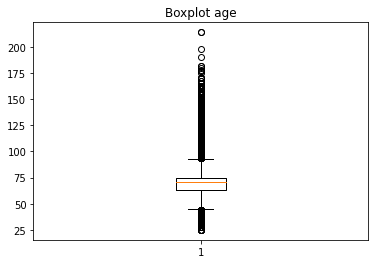

In [15]:
import matplotlib.pyplot as plt
boxplot_weight=df['Weight']
plt.boxplot(boxplot_weight)
plt.title('Boxplot age')
plt.show()

In [16]:
from matplotlib.cbook import boxplot_stats 
stats = boxplot_stats(boxplot_weight)
stats = stats[0] 
outliers = stats['fliers']
min = stats['q1']-1.5*stats['iqr']
max = stats['q3']+1.5*stats['iqr']
print(min, max, len(outliers))

45.0 93.0 15574


In [17]:
corte1 = min
corte2 = max
df['Weight_cat'] = "Delgado"
df.loc[(df['Weight'] > corte1) & (df['Weight'] <= corte2), 'Weight_cat'] = "EnForma"
df.loc[df['Weight'] > corte2, 'Weight_cat'] = "Pesado"

<ipython-input-17-5f781fa7dadf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weight_cat'] = "Delgado"


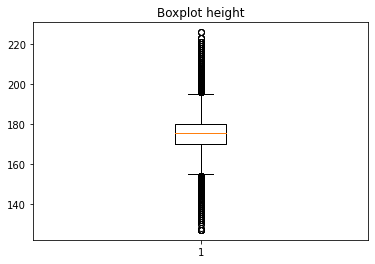

In [18]:
import matplotlib.pyplot as plt
boxplot_height=df['Height']
plt.boxplot(boxplot_height)
plt.title('Boxplot height')
plt.show()

In [19]:
from matplotlib.cbook import boxplot_stats 
stats = boxplot_stats(boxplot_height)
stats = stats[0] 
outliers = stats['fliers']
min = stats['q1']-1.5*stats['iqr']
max = stats['q3']+1.5*stats['iqr']
print(min, max, len(outliers))

155.0 195.0 10532


In [20]:
corte1 = min
corte2 = max
df['Height_cat'] = "Bajo"
df.loc[(df['Height'] > corte1) & (df['Height'] <= corte2), 'Height_cat'] = "Medio"
df.loc[df['Height'] > corte2, 'Height_cat'] = "Alto"

<ipython-input-20-928d2a63bf41>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Height_cat'] = "Bajo"


In [21]:
df

,Name,Sex,Age,Height,Weight,Games,NOC,Event,Medal,Age_cat,Weight_cat,Height_cat
0,A Dijiang,M,24.0,180.00000,80.000000,1992 Summer,CHN,Basketball Men's Basketball,Zero,Media,EnForma,Medio
1,A Lamusi,M,23.0,170.00000,60.000000,2012 Summer,CHN,Judo Men's Extra-Lightweight,Zero,Media,EnForma,Medio
2,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,1920 Summer,DEN,Football Men's Football,Zero,Media,EnForma,Medio
3,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,1900 Summer,DEN,Tug-Of-War Men's Tug-Of-War,Gold,Media,EnForma,Medio
4,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,1988 Winter,NED,Speed Skating Women's 500 metres,Zero,Media,EnForma,Medio
...,...,...,...,...,...,...,...,...,...,...,...,...
271111,Andrzej ya,M,29.0,179.00000,89.000000,1976 Winter,POL,Luge Mixed (Men)'s Doubles,Zero,Media,EnForma,Medio
271112,Piotr ya,M,27.0,176.00000,59.000000,2014 Winter,POL,"Ski Jumping Men's Large Hill, Individual",Zero,Media,EnForma,Medio
271113,Piotr ya,M,27.0,176.00000,59.000000,2014 Winter,POL,"Ski Jumping Men's Large Hill, Team",Zero,Media,EnForma,Medio
271114,Tomasz Ireneusz ya,M,30.0,185.00000,96.000000,1998 Winter,POL,Bobsleigh Men's Four,Zero,Media,Pesado,Medio


In [22]:
# Selecciona el 80% de las filas al azar
train=df.iloc[:216892]
test=df.iloc[216893:]

In [23]:
dfSex=pd.get_dummies(df['Sex'])
dfSex=pd.get_dummies(df['Sex'])